**Goal:** 
- Explore a few methods/tricks that are useful for training very deep networks.
- Compare it to the baseline of doing nothing.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input, AlphaDropout, BatchNormalization, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

In [2]:
df = pd.read_csv("./data/fashion/fashion-mnist_train.zip")

In [3]:
X = df.iloc[:,1:].values/255.
y = df.iloc[:,0].values

## Testbed model
- Neural network with 20 hidden layers, each of them with 100 neurons.

In [4]:
def plot_learning_curves(history):
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Number of epochs')
    plt.ylim(0,1)
    plt.legend()

In [5]:
import time

In [6]:
start = time.time() 

model = Sequential()
model.add(Input(shape=(784,)))
for _ in range(20):
    model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizers=SGD(1e-3))

history = model.fit(X,y, epochs=10, validation_split=0.1, verbose=0)

end = time.time()

print('Training completed: It took {} seconds'.format(end-start))


Training completed: It took 216.50896167755127 seconds


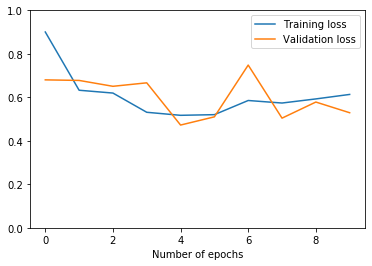

In [7]:
plot_learning_curves(history)

### Adding batch normalization

- Before going to the (non-linear) activation function, the input values get rescaled.
- This can help to regularize the training procedure overall.

In [8]:
start = time.time() 

model = Sequential()
model.add(Input(shape=(784,)))
for _ in range(20):
    model.add(Dense(100))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizers=SGD(1e-3))

history = model.fit(X,y, epochs=10, validation_split=0.1, verbose=0)

end = time.time()

print('Training completed: It took {} seconds'.format(end-start))


Training completed: It took 641.8458201885223 seconds


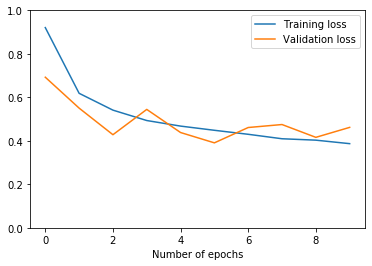

In [9]:
plot_learning_curves(history)

### SELU activation with LeCun normal weight initializer

In [10]:
start = time.time() 

model = Sequential()
model.add(Input(shape=(784,)))
for _ in range(20):
    model.add(AlphaDropout(0.1)) # You can also dropout here, with smaller values. HEURISTIC HEURISTIC HEURISTIC
    model.add(Dense(100, kernel_initializer='lecun_normal'))
    model.add(Activation('selu'))
model.add(AlphaDropout(0.5)) # Dropout layer that can prevent overfitting (when in the end, with a high value)    
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizers=SGD(1e-3))

history = model.fit(X,y, epochs=10, validation_split=0.1, verbose=0)

end = time.time()

print('Training completed: It took {} seconds'.format(end-start))


Training completed: It took 375.33610367774963 seconds


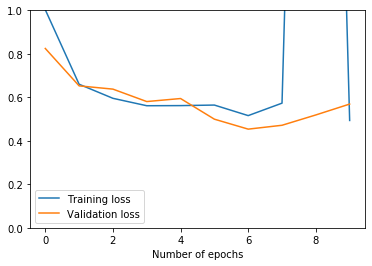

In [11]:
plot_learning_curves(history)